<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preface" data-toc-modified-id="Preface-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preface</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Set-Notebook-Options" data-toc-modified-id="Set-Notebook-Options-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Set Notebook Options</a></span></li></ul></li><li><span><a href="#Image-Exploration" data-toc-modified-id="Image-Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Image Exploration</a></span></li><li><span><a href="#K-Means-Clustering" data-toc-modified-id="K-Means-Clustering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>K-Means Clustering</a></span><ul class="toc-item"><li><span><a href="#Idea" data-toc-modified-id="Idea-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Idea</a></span></li><li><span><a href="#Simple-Example" data-toc-modified-id="Simple-Example-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Simple Example</a></span></li><li><span><a href="#Iterate" data-toc-modified-id="Iterate-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Iterate</a></span></li><li><span><a href="#Clustering-Metrics:-Optimal-Number-of-Colors" data-toc-modified-id="Clustering-Metrics:-Optimal-Number-of-Colors-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Clustering Metrics: Optimal Number of Colors</a></span></li><li><span><a href="#Compare-to-Original-Image" data-toc-modified-id="Compare-to-Original-Image-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Compare to Original Image</a></span></li></ul></li><li><span><a href="#Principal-Component-Analysis-(PCA)" data-toc-modified-id="Principal-Component-Analysis-(PCA)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Principal Component Analysis (PCA)</a></span><ul class="toc-item"><li><span><a href="#Idea" data-toc-modified-id="Idea-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Idea</a></span></li><li><span><a href="#Principal-Component-of-RGB-Channel" data-toc-modified-id="Principal-Component-of-RGB-Channel-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Principal Component of RGB Channel</a></span></li><li><span><a href="#Iterate" data-toc-modified-id="Iterate-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Iterate</a></span></li><li><span><a href="#PCA-Metrics:-Optimal-Number-of-Principal-Components" data-toc-modified-id="PCA-Metrics:-Optimal-Number-of-Principal-Components-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>PCA Metrics: Optimal Number of Principal Components</a></span></li><li><span><a href="#Compare-to-Original-Image" data-toc-modified-id="Compare-to-Original-Image-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Compare to Original Image</a></span></li></ul></li><li><span><a href="#Comparison-of-K-Means-and-PCA" data-toc-modified-id="Comparison-of-K-Means-and-PCA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comparison of K-Means and PCA</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# IMAGE COMPRESSION USING K-MEANS CLUSTERING AND PRINCIPAL COMPONENT ANALYSIS <a class='tocSkip'>

# Preface
## Introduction
Hello! In this notebook, we try to implement and compare the result of K-Means clustering algorithm and Principal Component Analysis (PCA) on image compression using the `sklearn` package. Compressed images are evaluated based on the memory size reduction and percentage on how good it can summarize or explain the variance of the original image. The objective of image compression is to reduce the memory size to be as small as possible while maintaining the similarity with the original image, which represented by the explained variance percentage. 

## Import Packages
First of all, let's us import some packages necessary for our analysis.

In [1]:
# image processing
from PIL import Image
from io import BytesIO
import webcolors

# data analysis
import math
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
from importlib import reload
from mpl_toolkits import mplot3d
import seaborn as sns

# modeling
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

## Set Notebook Options
- Suppress image clipping warning
- Set color of plot to be contrast
- Change float format to three decimal places

In [2]:
import logging
logger = logging.getLogger()
old_level = logger.level
logger.setLevel(100)
sns.set(style="ticks", color_codes=True)
pd.options.display.float_format = '{:.3f}'.format

# Image Exploration
Each pixel in an image can be represented as three 8-bit unsigned (positive) integers ranging from 0 to 255, or scaled into three unsigned (positive) float ranging from 0 to 1. The three values specify the intensity values of each red, green, blue color, which often called as RGB encoding. In this notebook, we use a 220 by 220 pixels of **lena.png**, which serve as a standard test image widely used in image processing field.

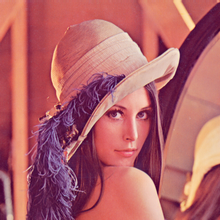

In [3]:
ori_img = Image.open("images/lena.png")
ori_img

In [4]:
X = np.array(ori_img.getdata())
ori_pixels = X.reshape(*ori_img.size, -1)
ori_pixels.shape

(220, 220, 3)

Pixels are stored as a 3D matrix with shape (220, 220, 3). The first two values specify the width and height of the image, the last value specifies the RGB encoding. Let us identify other attributes of an image, which are image size in kilobytes (KB) and the number of unique colors.

In [5]:
def imageByteSize(img):
    img_file = BytesIO()
    image = Image.fromarray(np.uint8(img))
    image.save(img_file, 'png')
    return img_file.tell()/1024

ori_img_size = imageByteSize(ori_img)
ori_img_size

85.99609375

In [6]:
ori_img_n_colors = len(set(ori_img.getdata()))
ori_img_n_colors

37270

The original image size of **lena.png** is 86 KB and has 37270 unique colors present in the image. So, we can say it is very unlikely for two pixels in **lena.png** to have the same exact RGB values.

Next, let's calculate the variance in our original image as a benchmark of our compression result.

$Variance = \sum\limits_{j=0}^k ||x_j-\bar{x}||^2$
where:
* $k$ is the number of data points
* $x_j$ is the $j$-th data, a 3D vector of RGB value
* $\bar{x}$ is the mean of each RGB value

In [7]:
ori_img_total_variance = sum(np.linalg.norm(X - np.mean(X, axis = 0), axis = 1)**2)
ori_img_total_variance

302426700.6427498

We couldn't interpret the value of variance on itself. We are going to use it later on, during K-Means clustering.

# K-Means Clustering
K-Means clustering is one of the commonly used unsupervised learning algorithm used for partitioning a dataset into a set of $k$ clusters, where $k$ has to be pre-specified by the user. The goal of this algorithm is to classify existing data points into clusters such that:

* The data within the same cluster are as similar as possible
* The data from different clusters are as dissimilar as possible

Each cluster is represented by a centroid, which is the mean of clustered data points.

Here is the algorithm:
1. User specifies the number of clusters $k$
2. Select $k$ different points randomly from the dataset as an initial centroid
3. Assign each data point to the closest centroid, commonly by Euclidean distance
4. Compute the new centroids by taking the mean of all data points that belong to the cluster
5. Repeat step 3 and 4 until it converges, i.e. no change in centroid position

Note that the converged solution may not be ideal, because it depends on the random initialization.

## Idea
Our original image contains thousands of colors. We will utilize K-Means clustering algorithm to reduce the number of colors so that it only needs to store certain numbers of RGB values only. Thus, will reduce the image size and making it more efficient in the storage. We can treat our pixel values as a data frame having (width $\times$ height) observations and 3 features which correspond to the RGB value. In the case of **lena.png**, we will have 220 $\times$ 220 (48400) observations and 3 features.

Therefore, we can visualize each pixel in a three-dimensional plot. Here are the first 220 pixels, which represent the first row pixels in the original image.

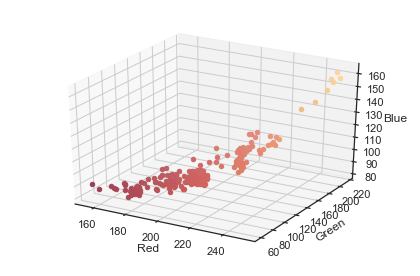

In [8]:
reload(plt)
fig = plt.figure("3-D Plot of Image")
ax = plt.axes(projection='3d')
for px in X[:ori_pixels.shape[0]]:
    ax.scatter3D(*px, c = np.array([px])/255)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
ax.dist = 11
plt.tight_layout()
plt.show()

## Simple Example
Before we iterate using various values for the number of colors $k$, let's use $k=2$ to understand what we are going to do. By the end of this section, we expect our image to only have 2 colors. First, let's create a `KMeans` object which fitted with our original pixels `X`.

In [9]:
kmeans = KMeans(n_clusters = 2,
                n_jobs = -1,
                random_state = 123).fit(X)
kmeans_df = pd.DataFrame(kmeans.cluster_centers_, columns = ['Red', 'Green', 'Blue'])
kmeans_df

Red   Green    Blue
0 130.543  47.389  77.450
1 213.718 133.891 124.260

Here's a function to convert RGB value to its English color name ([Reference](https://stackoverflow.com/questions/9694165/convert-rgb-color-to-english-color-name-like-green-with-python)):

In [10]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
    return closest_name

In [11]:
kmeans_df["Color Name"] = list(map(get_colour_name, np.uint8(kmeans.cluster_centers_)))
kmeans_df

Red   Green    Blue  Color Name
0 130.543  47.389  77.450       brown
1 213.718 133.891 124.260  darksalmon

As we can see, we get two centroids as we specify the `n_clusters` parameter equal to 2. Next step, we can represent each of the pixels value in a cluster by its cluster centroid. Thus, there will be only two unique pixel values in the compressed image.

In [12]:
def replaceWithCentroid(kmeans):
    new_pixels = []
    for label in kmeans.labels_:
        pixel_as_centroid = list(kmeans.cluster_centers_[label])
        new_pixels.append(pixel_as_centroid)
    new_pixels = np.array(new_pixels).reshape(*ori_img.size, -1)
    return new_pixels

new_pixels = replaceWithCentroid(kmeans)

Our clustering step is done, let's take a look at the compressed image result.

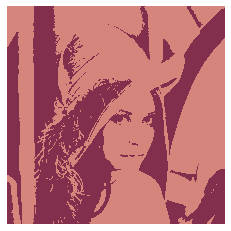

In [13]:
def plotImage(img_array, size):
    reload(plt)
    plt.imshow(np.array(img_array/255).reshape(*size))
    plt.axis('off')
    return plt
    
plotImage(new_pixels, new_pixels.shape).show()

K-Means successfully retain the shape of **lena.png** by using only two colors: *brown* and *dark salmon*. Visually, we can compare the compressed image being similar to the original image. But how do we do it objectively? Let's introduce a set of metrics to evaluate the compressed image:

1. Within Cluster Sum of Square ($WCSS$), measures the sum of squared Euclidean distance of all the points within a cluster to its cluster centroid.

    $WCSS = \sum\limits_{i=0}^N ||x_i-c_{p(i)}||^2$
    
    where:
    * $N$ is the number of data points
    * $x_i$ is the $i$-th data, a 3D vector of RGB value
    * $c_{p(i)}$ is the cluster centroid of data-$i$

2. Between Cluster Sum of Square ($BCSS$), measures the sum of squared Euclidean distance between all centroids.

    $BCSS = \sum\limits_{j=0}^k n_j . ||c_j-\bar{x}||^2$
    
    where:
    * $k$ is the number of cluster
    * $n_j$ is the total data present in cluster-$j$
    * $c_j$ is the centroid of cluster-$j$, a 3D vector of RGB value
    * $\bar{x}$ is the mean of each RGB value

3. Explained Variance, measures how many percents that the compressed image can explain the variance of the original image.

    $Explained Variance = \dfrac{BCSS}{WCSS+BCSS}$
    
If each pixel is considered as an individual cluster ($k = N$), then $WCSS$ is equal to $0$.

Hence, $Explained Variance = 100\%$

4. Image size, measured in kilobytes to evaluate the reduction/compression performance.


In [14]:
def calculateBCSS(X, kmeans):
    _, label_counts = np.unique(kmeans.labels_, return_counts = True)
    diff_cluster_sq = np.linalg.norm(kmeans.cluster_centers_ - np.mean(X, axis = 0), axis = 1)**2
    return sum(label_counts * diff_cluster_sq)

WCSS = kmeans.inertia_
BCSS = calculateBCSS(X, kmeans)
exp_var = 100*BCSS/(WCSS + BCSS)
print("WCSS: {}".format(WCSS))
print("BCSS: {}".format(BCSS))
print("Explained Variance: {:.3f}%".format(exp_var))
print("Image Size: {:.3f} KB".format(imageByteSize(new_pixels)))

WCSS: 109260691.314189
BCSS: 193071692.34763986
Explained Variance: 63.861%
Image Size: 4.384 KB


There is a huge drop in image size from 86 KB to 4.384 KB, but the trade-off is that the compressed image can only explain the variance of the original image as much as 63.861%. We expect higher explained variance percentage than this. Next, we iterate the above process for several numbers of $k$ to achieve this goal.

## Iterate
In this section, we will be performing these steps for $k=2$ until $k=20$:
1. Perform K-Means to get the cluster centroids and cluster labels for each pixel
2. Replace each pixel with its cluster centroids.
3. Save metrics value for further optimization: WCSS, BCSS, Explained Variance, and Image Size
4. Plot the compressed image with an increasing number of colors

In [15]:
range_k_clusters = (2, 21)

kmeans_result = []
for k in range(*range_k_clusters):
    # CLUSTERING
    kmeans = KMeans(n_clusters = k,
                    n_jobs = -1,
                    random_state = 123).fit(X)
    
    # REPLACE PIXELS WITH ITS CENTROID
    new_pixels = replaceWithCentroid(kmeans)
    
    # EVALUATE
    WCSS = kmeans.inertia_
    BCSS = calculateBCSS(X, kmeans)
    exp_var = 100*BCSS/(WCSS + BCSS)
    
    metric = {
        "No. of Colors": k,
        "Centroids": list(map(get_colour_name, np.uint8(kmeans.cluster_centers_))),
        "Pixels": new_pixels,
        "WCSS": WCSS,
        "BCSS": BCSS,
        "Explained Variance": exp_var,
        "Image Size (KB)": imageByteSize(new_pixels)
    }
    
    kmeans_result.append(metric)
kmeans_result = pd.DataFrame(kmeans_result).set_index("No. of Colors")
kmeans_result

Centroids  \
No. of Colors                                                      
2                                            [brown, darksalmon]   
3                                  [brown, burlywood, indianred]   
4                      [brown, lightcoral, indianred, burlywood]   
5              [burlywood, indigo, indianred, darksalmon, sie...   
6              [gray, indigo, indianred, darksalmon, sienna, ...   
7              [brown, gray, indianred, burlywood, darksalmon...   
8              [indigo, lightcoral, indianred, wheat, gray, s...   
9              [darksalmon, brown, indianred, lightcoral, whe...   
10             [wheat, brown, indianred, rosybrown, indigo, d...   
11             [tan, brown, indianred, indianred, wheat, dimg...   
12             [dimgray, gray, indianred, tan, indigo, rosybr...   
13             [tan, brown, indianred, indianred, wheat, dimg...   
14             [gray, brown, indianred, rosybrown, indianred,...   
15             [indianred, brown, tan, gray, indianred, dimgr...   
16             [lightcoral, brown, tan, gray, indianred, dimg...   
17             [brown, lightcoral, wheat, sienna, gray, india...   
18             [lightcoral, brown, tan, rosybrown, indianred,...   
19             [indigo, lightcoral, indianred, burlywood, ind...   
20             [indigo, lightcoral, indianred, burlywood, ind...   

                                                          Pixels  \
No. of Colors                                                      
2              [[[213.71831326970442, 133.89131036391043, 124...   
3              [[[225.44421388667087, 167.00351157222383, 147...   
4              [[[212.22476813966176, 122.26475722858449, 114...   
5              [[[214.57149746804404, 134.9070010449294, 123....   
6              [[[216.79463980880337, 136.00623079549067, 122...   
7              [[[217.59388368070853, 137.3576954582662, 122....   
8              [[[213.39740529319698, 128.35910742085883, 117...   
9              [[[226.33964646464273, 156.76578282828027, 134...   
10             [[[227.54112013324607, 143.86445971267722, 121...   
11             [[[229.63865954346397, 145.22219524040568, 121...   
12             [[[232.0675287356287, 146.05028735631967, 119....   
13             [[[232.373039806993, 146.9517490952934, 120.35...   
14             [[[232.1878698224818, 146.8443786982227, 120.5...   
15             [[[232.26439169139124, 146.74065281898896, 120...   
16             [[[232.79283130548842, 148.43834265044183, 121...   
17             [[[233.0403556771515, 149.07865937072293, 121....   
18             [[[233.0540075679364, 147.91916064671275, 120....   
19             [[[225.982119635888, 129.52698309492663, 111.6...   
20             [[[226.09115014915207, 129.74444812727694, 111...   

                       WCSS          BCSS  Explained Variance  Image Size (KB)  
No. of Colors                                                                   
2             109260691.314 193071692.348              63.861            4.384  
3              60795921.691 241634439.983              79.898            6.662  
4              38292049.462 264545564.909              87.356            8.654  
5              29538830.911 272910737.918              90.233           10.585  
6              24409470.444 278003187.529              91.928           11.326  
7              20887441.726 281360887.299              93.089           13.569  
8              18297276.464 284393072.513              93.955           15.281  
9              16230595.162 286412168.440              94.637           16.035  
10             14676988.698 287525637.052              95.143           17.332  
11             13371096.205 289082601.347              95.579           17.481  
12             12348600.002 289987268.675              95.916           18.049  
13             11318553.288 291348286.045              96.260           20.427  
14             10408321.707 292089088.940              96.559  

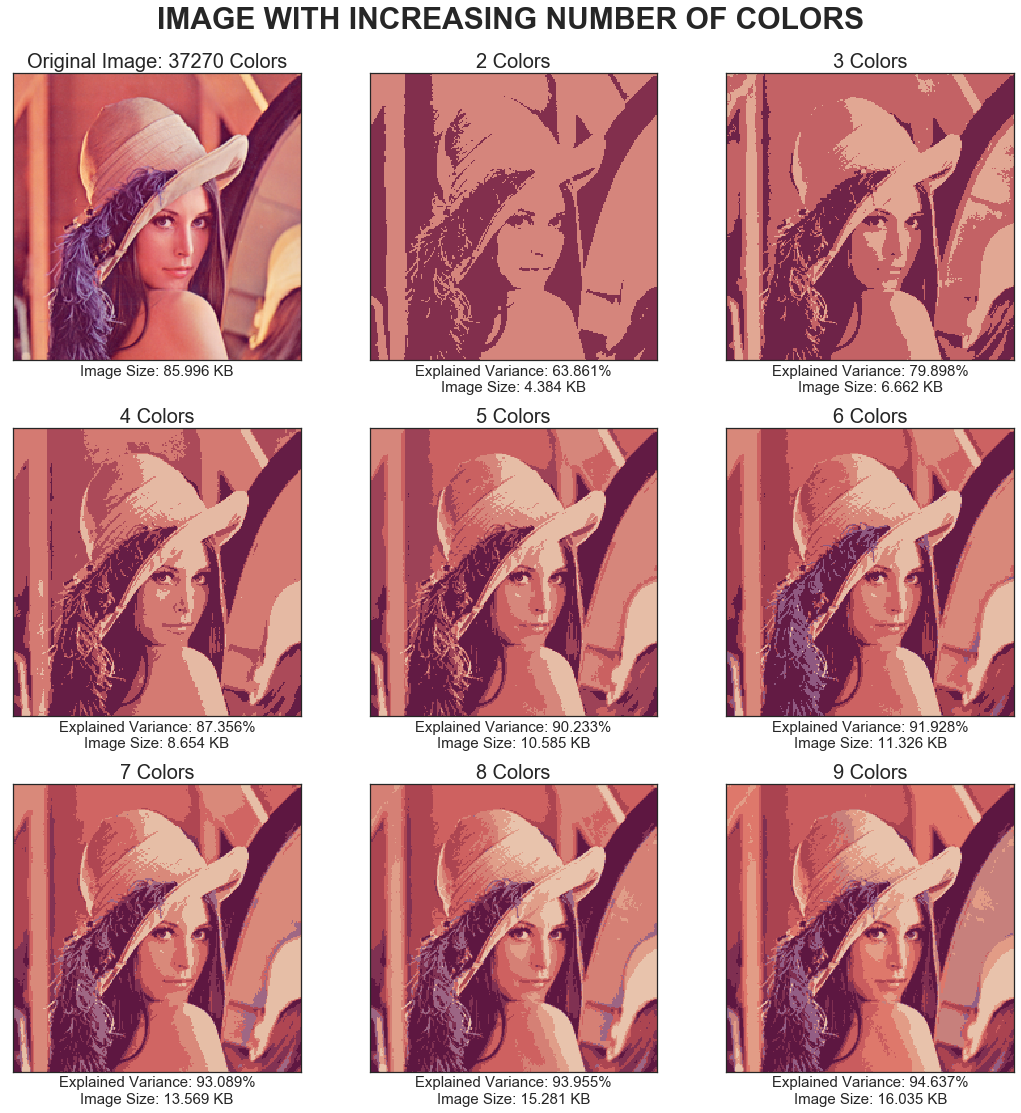

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15,15))

# PLOT ORIGINAL IMAGE
axes[0][0].imshow(X.reshape(*ori_img.size, 3))
axes[0][0].set_title("Original Image: {} Colors".format(ori_img_n_colors), fontsize = 20)
axes[0][0].set_xlabel("Image Size: {:.3f} KB".format(ori_img_size), fontsize = 15)
axes[0][0].set_xticks([])
axes[0][0].set_yticks([])

# PLOT COLOR-REDUCED IMAGE
for ax, k, pixels in zip(axes.flat[1:], kmeans_result.index, kmeans_result["Pixels"]):
    compressed_image = np.array(pixels/255).reshape(*ori_img.size, 3)
    ax.imshow(compressed_image)
    ax.set_title("{} Colors".format(k), fontsize=20)
    ax.set_xlabel("Explained Variance: {:.3f}%\nImage Size: {:.3f} KB".format(kmeans_result.loc[k, "Explained Variance"],
                                                                              kmeans_result.loc[k, "Image Size (KB)"]),
                  fontsize=15)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
fig.suptitle("IMAGE WITH INCREASING NUMBER OF COLORS", size = 30, y = 1.03, fontweight = "bold")
plt.show()

## Clustering Metrics: Optimal Number of Colors
In this section, we will try to search for an optimal number of colors (clusters) $k$ in order to reduce the memory size to be as small as possible while maintaining high explained variance percentage.

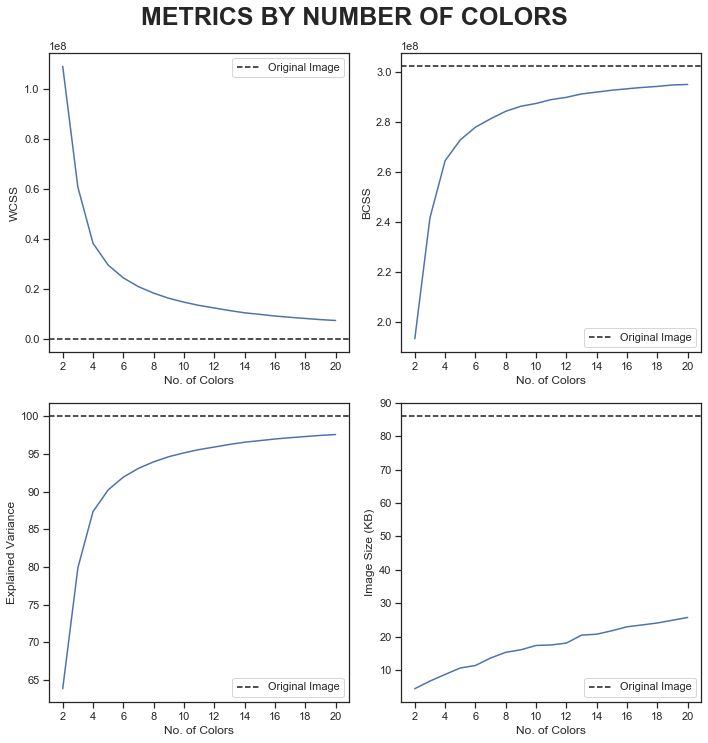

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
for ax, metric in zip(axes.flat, kmeans_result.columns[2:]):
    sns.lineplot(x = kmeans_result.index, y = metric, data = kmeans_result, ax = ax)
    
    if metric == "WCSS":
        y_val = 0
    elif metric == "BCSS":
        y_val = ori_img_total_variance
    elif metric == "Explained Variance":
        y_val = 100
    elif metric == "Image Size (KB)":
        y_val = ori_img_size
    
    ax.axhline(y = y_val, color = 'k', linestyle = '--', label = "Original Image")
    ax.set_xticks(kmeans_result.index[::2])
    ax.ticklabel_format(useOffset = False)
    ax.legend()
plt.tight_layout()
fig.suptitle("METRICS BY NUMBER OF COLORS", size = 25, y = 1.03, fontweight = "bold")
plt.show()

How to locate the optimal number of colors $k$ objectively? Here is the idea:
1. Connect the first and last point of the curve with a straight line
2. Calculate the perpendicular distance from each point to that line
3. Consider the longest distance as the elbow

Illustration ([Reference](https://www.researchgate.net/publication/281443471_Novel_Clustering_Selection_Criterion_for_Fast_Binary_Key_Speaker_Diarization)):
<img src="images/elbow_method.png" width="400">

Next question, how to calculate the perpendicular distance in step 2? Simple, we can use the distance formula from point $(x_0,y_0)$ to line $ax+by+c=0$ as illustrated below ([Reference](https://www.youtube.com/watch?v=tngPrM2d-OM)):
<img src="images/distance_formula.jpg" width="400">

In [18]:
def locateOptimalElbow(x, y):
    # START AND FINAL POINTS
    p1 = (x[0], y[0])
    p2 = (x[-1], y[-1])
    
    # EQUATION OF LINE: y = mx + c
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    c = (p2[1] - (m * p2[0]))
    
    # DISTANCE FROM EACH POINTS TO LINE mx - y + c = 0
    a, b = m, -1
    dist = np.array([abs(a*x0+b*y0+c)/math.sqrt(a**2+b**2) for x0, y0 in zip(x,y)])
    return np.argmax(dist) + x[0]

But how if the graph is not an increasing or decreasing curve function? We can use finite difference method to locate the most drastic change in gradient using the second derivative.

What is finite difference method? It is a numerical method to approximate the derivative of discrete values. There are three types which are commonly used:
1. Forward Difference: $f'(x) = \dfrac{f(x+h)-f(x)}{h} + O(h)$
2. Backward Difference: $f'(x) = \dfrac{f(x)-f(x-h)}{h} + O(h)$
3. Central Difference: $f'(x) = \dfrac{f(x+h)-f(x-h)}{2h} + O(h^2)$

where:
* $f'(x)$ is the first derivative of function $f(x)$
* $h$ is the step, in this case $h=1$ (the step in the number of colors)
* $O(h)$ is the first-degree error term
* $O(h^2)$ is the second-degree error term

The central difference is expected to give better results than the other two since it has a higher degree error term. We use forward difference only for the first point and backward difference only for the last point.

In [19]:
def calculateDerivative(data):
    derivative = []
    for i in range(len(data)):
        if i == 0:
            # FORWARD DIFFERENCE
            d = data[i+1] - data[i]
        elif i == len(data) - 1:
            # BACKWARD DIFFERENCE
            d = data[i] - data[i-1]
        else:
            # CENTER DIFFERENCE
            d = (data[i+1] - data[i-1])/2
        derivative.append(d)
    return np.array(derivative)

def locateDrasticChange(x, y):
    # CALCULATE GRADIENT BY FIRST DERIVATIVE
    first_derivative = calculateDerivative(np.array(y))
    
    # CALCULATE CHANGE OF GRADIENT BY SECOND DERIVATIVE
    second_derivative = calculateDerivative(first_derivative)

    return np.argmax(np.abs(second_derivative)) + x[0]

In [20]:
optimal_k = []
for col in kmeans_result.columns[2:]:
    optimal_k_dict = {}
    optimal_k_dict["Metric"] = col
    if col == "Image Size (KB)":
        optimal_k_dict["Method"] = "Derivative"
        optimal_k_dict["Optimal k"] = locateDrasticChange(kmeans_result.index, kmeans_result[col].values)
    else:
        optimal_k_dict["Method"] = "Elbow"
        optimal_k_dict["Optimal k"] = locateOptimalElbow(kmeans_result.index, kmeans_result[col].values)
    optimal_k.append(optimal_k_dict)
optimal_k = pd.DataFrame(optimal_k)
optimal_k

Metric      Method  Optimal k
0                WCSS       Elbow          5
1                BCSS       Elbow          5
2  Explained Variance       Elbow          5
3     Image Size (KB)  Derivative         12

We choose the largest optimal $k$ as the representative of all optimal $k$:

In [21]:
k_opt = optimal_k["Optimal k"].max()
k_opt

12

## Compare to Original Image
Finally, let's compare the compressed image using $k = 12$ with the original image side by side.

In [22]:
ori = {
    "Type": "Original",
    "Pixels": X,
    "No. of Colors": ori_img_n_colors,
    "Image Size (KB)": ori_img_size,
    "Explained Variance": 100
}
color_reduced = {
    "Type": "Color-Reduced",
    "Pixels": kmeans_result.loc[k_opt, "Pixels"],
    "No. of Colors": k_opt,
    "Image Size (KB)": kmeans_result.loc[k_opt, "Image Size (KB)"],
    "Explained Variance": kmeans_result.loc[k_opt, "Explained Variance"]
}
ori_vs_kmeans = pd.DataFrame([ori, color_reduced]).set_index("Type")
ori_vs_kmeans

Pixels  \
Type                                                               
Original       [[225, 137, 127], [224, 137, 127], [227, 134, ...   
Color-Reduced  [[[232.0675287356287, 146.05028735631967, 119....   

               No. of Colors  Image Size (KB)  Explained Variance  
Type                                                               
Original               37270           85.996             100.000  
Color-Reduced             12           18.049              95.916

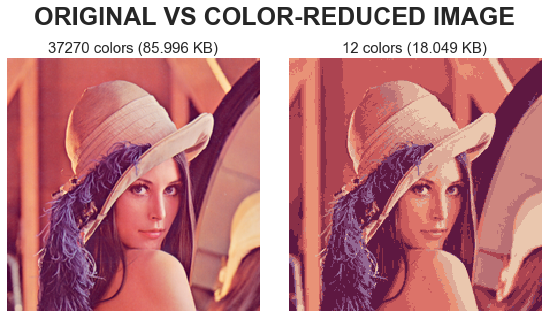

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
for ax, (typ, row) in zip(axes.flat, ori_vs_kmeans.iterrows()):
    img_array = np.array(row["Pixels"]/255)
    ax.imshow(img_array.reshape(*ori_img.size, 3))
    ax.axis("off")
    ax.set_title("{} colors ({:.3f} KB)".format(row["No. of Colors"], row["Image Size (KB)"]), fontsize=15)
plt.tight_layout()
fig.suptitle("ORIGINAL VS COLOR-REDUCED IMAGE", size = 25, y = 1.1, fontweight = "bold")
plt.show()

In [24]:
relative_size = ori_vs_kmeans.loc["Color-Reduced", "Image Size (KB)"]/ori_vs_kmeans.loc["Original", "Image Size (KB)"]
print("Reduction: {:.3f}% from original image size".format((1-relative_size)*100))
print("Explained Variance: {:.3f}%".format(ori_vs_kmeans.loc["Color-Reduced", "Explained Variance"]))

Reduction: 79.012% from original image size
Explained Variance: 95.916%


By using K-Means, we achieve a significant reduction of 79.012% in the image size and 95.916% variance of original image can be explained by the compressed image, which is great! Next, we perform a PCA and see whether it can beat K-Means or not.

# Principal Component Analysis (PCA)
PCA is one of the unsupervised learning techniques used for dimensionality reduction. It computes eigenvectors from the covariance matrix, which then we called as **principal axes**, and sorted decreasingly by the eigenvalues called **percentage of explained variance**. The dataset is then centered and projected to the principal axes which form **principal components** (or scores). To reduce the data dimension, we only keep a certain number of principal components $n$ to explain the variance of the original dataset and ignore the rest.
<br><br>
Let's say we have a dataset $X_{ori}$ with $m$ observations and $n$ features. Subtract the mean for each row, we get the centered data $X$. Then, PCA will compute $k$ eigenvectors for each feature which yields a matrix $V$ with shape $n \times k$. The PCA projection or score will be given as $Z=XV$ where the dimension of $Z$ is now $m \times k$.
<br><br>
For dimensionality reduction, we choose $n_{select}$ to be less than $n$ in $X_{ori}$. Here's how we reconstruct the matrix $X$ by using the selected PC: $\hat{X} = Z_{reduce}V_{reduce}^T$ where:
- The dimension of $Z_{reduce}$ is $m \times n_{select}$
- The dimension of $V_{reduce}$ is $n \times n_{select}$
- $T$ is the matrix transpose operation

Lastly, we add the mean to $\hat{X}$ to get the final PCA reconstruction of $\hat{X}_{ori}$ as follows:
<center>$ PCA Reconstruction = Projection . Eigenvectors^T + Mean $</center>

## Idea
We will utilize PCA to reduce the image size by selecting a certain number of principal components $n_{select}$ to be used so that it only stores the important pixels to preserve the variance of the original image - making it more efficient in the storage. 

Our original image consists of three color channels: red, green, and blue. For each color channel, we treat the pixels as a 2D matrix with (height) observations and (width) features. In **lena.png**, we have three 2D matrices with 220 observations and 220 features.

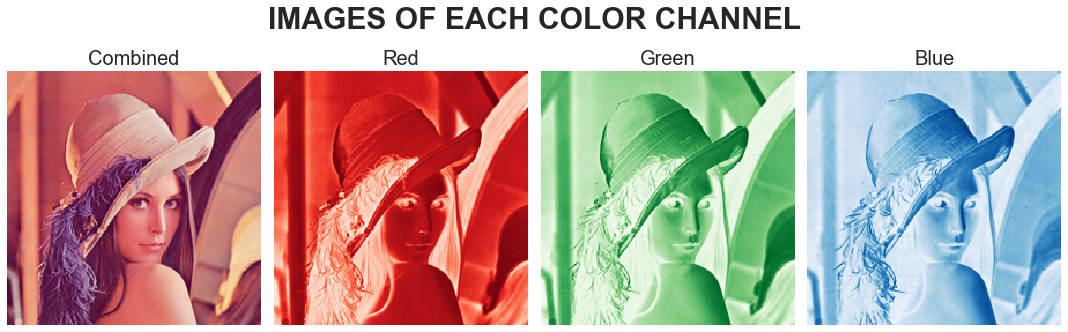

In [25]:
fig, axes = plt.subplots(1, 4, figsize=(15,5))
cmap_list = ["Reds", "Greens", "Blues"]

axes[0].imshow(ori_pixels)
axes[0].axis("off")
axes[0].set_title("Combined", size = 20)

for idx, ax, px in zip(range(3), axes[1:], ori_pixels.T):
    ax.imshow(px.T, cmap = cmap_list[idx])
    ax.axis("off")
    ax.set_title(cmap_list[idx][:-1], size = 20)
    
plt.tight_layout()
fig.suptitle("IMAGES OF EACH COLOR CHANNEL", size = 30, y = 1.03, fontweight = "bold")
plt.show()

## Principal Component of RGB Channel
PCA is performed on each color channel, resulting in a PCA projection (or scores) and principal components (axes) which both will be in the form of a matrix with shape $220 \times 220$.

In [26]:
res = []
cum_var = []
X_t = np.transpose(X)
for channel in range(3):
    # SEPARATE EACH RGB CHANNEL
    pixel = X_t[channel].reshape(*ori_pixels.shape[:2])
    
    # PCA
    pca = PCA(random_state = 123)
    pixel_pca = pca.fit_transform(pixel)
    
    pca_dict = {
        "Projection": pixel_pca,
        "Components": pca.components_,
        "Mean": pca.mean_
    }
    res.append(pca_dict)
    
    # EVALUATION
    cum_var.append(np.cumsum(pca.explained_variance_ratio_))

We can visualize the principal components for each color channel as follows:

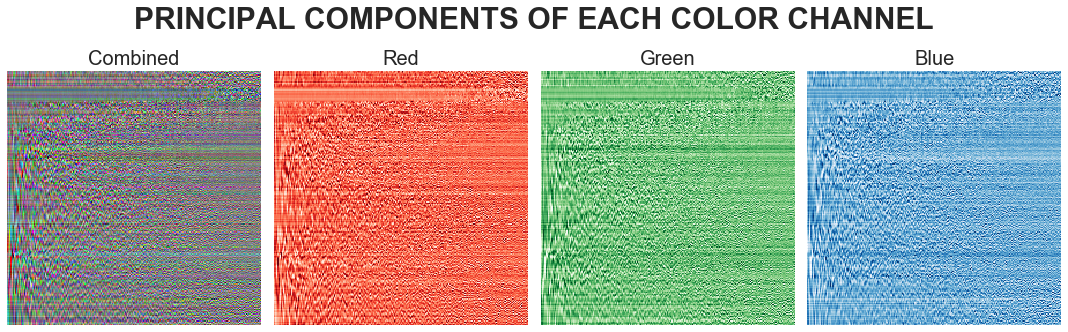

In [27]:
scaler = MinMaxScaler()
scaled_pixels = [scaler.fit_transform(res[i]["Components"])*255 for i in range(3)]

fig, axes = plt.subplots(1, 4, figsize=(15,5))
cmap_list = ["Reds", "Greens", "Blues"]

axes[0].imshow(np.array(scaled_pixels).T/255)
axes[0].axis("off")
axes[0].set_title("Combined", size = 20)

for idx, ax, px in zip(range(3), axes[1:], scaled_pixels):
    ax.imshow((px/255).T, cmap = cmap_list[idx])
    ax.axis("off")
    ax.set_title(cmap_list[idx][:-1], size = 20)
plt.tight_layout()

fig.suptitle("PRINCIPAL COMPONENTS OF EACH COLOR CHANNEL", size = 30, y = 1.03, fontweight = "bold")
plt.show()

The visualization of PCs is not informative enough, it's quite random. We should introduce a metric called the percentage of explained variance to evaluate the PC performance. The value ranges from 0 to 100 percent, indicating the similarity between the original image with the compressed image.

In [28]:
cum_var_df = pd.DataFrame(np.array(cum_var).T * 100, 
                          index = range(1, pca.n_components_+1),
                          columns = ["Explained Variance by Red",
                                     "Explained Variance by Green",
                                     "Explained Variance by Blue"])
cum_var_df["Explained Variance"] = cum_var_df.mean(axis = 1)
cum_var_df

Explained Variance by Red  Explained Variance by Green  \
1                       30.322                       24.874   
2                       46.154                       41.736   
3                       56.734                       52.313   
4                       64.023                       60.107   
5                       70.910                       65.396   
..                         ...                          ...   
216                    100.000                      100.000   
217                    100.000                      100.000   
218                    100.000                      100.000   
219                    100.000                      100.000   
220                    100.000                      100.000   

     Explained Variance by Blue  Explained Variance  
1                        20.647              25.281  
2                        40.449              42.780  
3                        50.879              53.309  
4                        58.213              60.781  
5                        63.927              66.744  
..                          ...                 ...  
216                     100.000             100.000  
217                     100.000             100.000  
218                     100.000             100.000  
219                     100.000             100.000  
220                     100.000             100.000  

[220 rows x 4 columns]

## Iterate
In this section, we will be performing these steps for $n_{select}=1$ until $n_{select}=220$:
1. Subset the first $n_{select}$ columns of PCA projection and the first $n_{select}$ rows of the components
2. Reconstruct the original image by the formula:
<center>$ PCA Reconstruction = Projection . Eigenvectors^T + Mean $</center>
3. Repeat step 1-2 for each color channel Red, Green, and Blue
4. Combine the PCA Reconstruction of the three color channel into one 3D matrix
5. Save metrics value for further optimization: Explained Variance, Image Size, and No. of Colors
6. Plot the compressed (reconstructed) image with an increasing number of principal components

In [29]:
pca_results = []
for n in range(1, pca.n_components_+1):
    # SELECT N-COMPONENTS FROM PC
    temp_res = []
    for channel in range(3):
        pca_channel = res[channel]
        pca_pixel = pca_channel["Projection"][:, :n]
        pca_comp = pca_channel["Components"][:n, :]
        pca_mean = pca_channel["Mean"]
        compressed_pixel = np.dot(pca_pixel, pca_comp) + pca_mean
        temp_res.append(compressed_pixel.T)
    compressed_image = np.transpose(temp_res)
    
    pca_dict = {
        "n": n,
        "Pixels": compressed_image,
        "Explained Variance": cum_var_df["Explained Variance"][n],
        "Image Size (KB)": imageByteSize(compressed_image),
        "No. of Colors": len(np.unique(np.uint8(compressed_image).reshape(-1, 3), axis = 0))
    }
    
    pca_results.append(pca_dict)

pca_results = pd.DataFrame(pca_results).set_index("n")
pca_results.head()

Pixels  Explained Variance  \
n                                                                          
1  [[[197.04434252288146, 74.80874312804772, 81.2...              25.281   
2  [[[202.69693083491518, 75.77550819768376, 80.3...              42.780   
3  [[[199.9502620731646, 85.94707173824675, 87.64...              53.309   
4  [[[199.09774664541806, 83.85824159985995, 87.0...              60.781   
5  [[[208.1853515202986, 91.19498360910256, 87.31...              66.744   

   Image Size (KB)  No. of Colors  
n                                  
1           34.700          30476  
2           43.257          39829  
3           47.349          41167  
4           50.664          42047  
5           53.288          42426

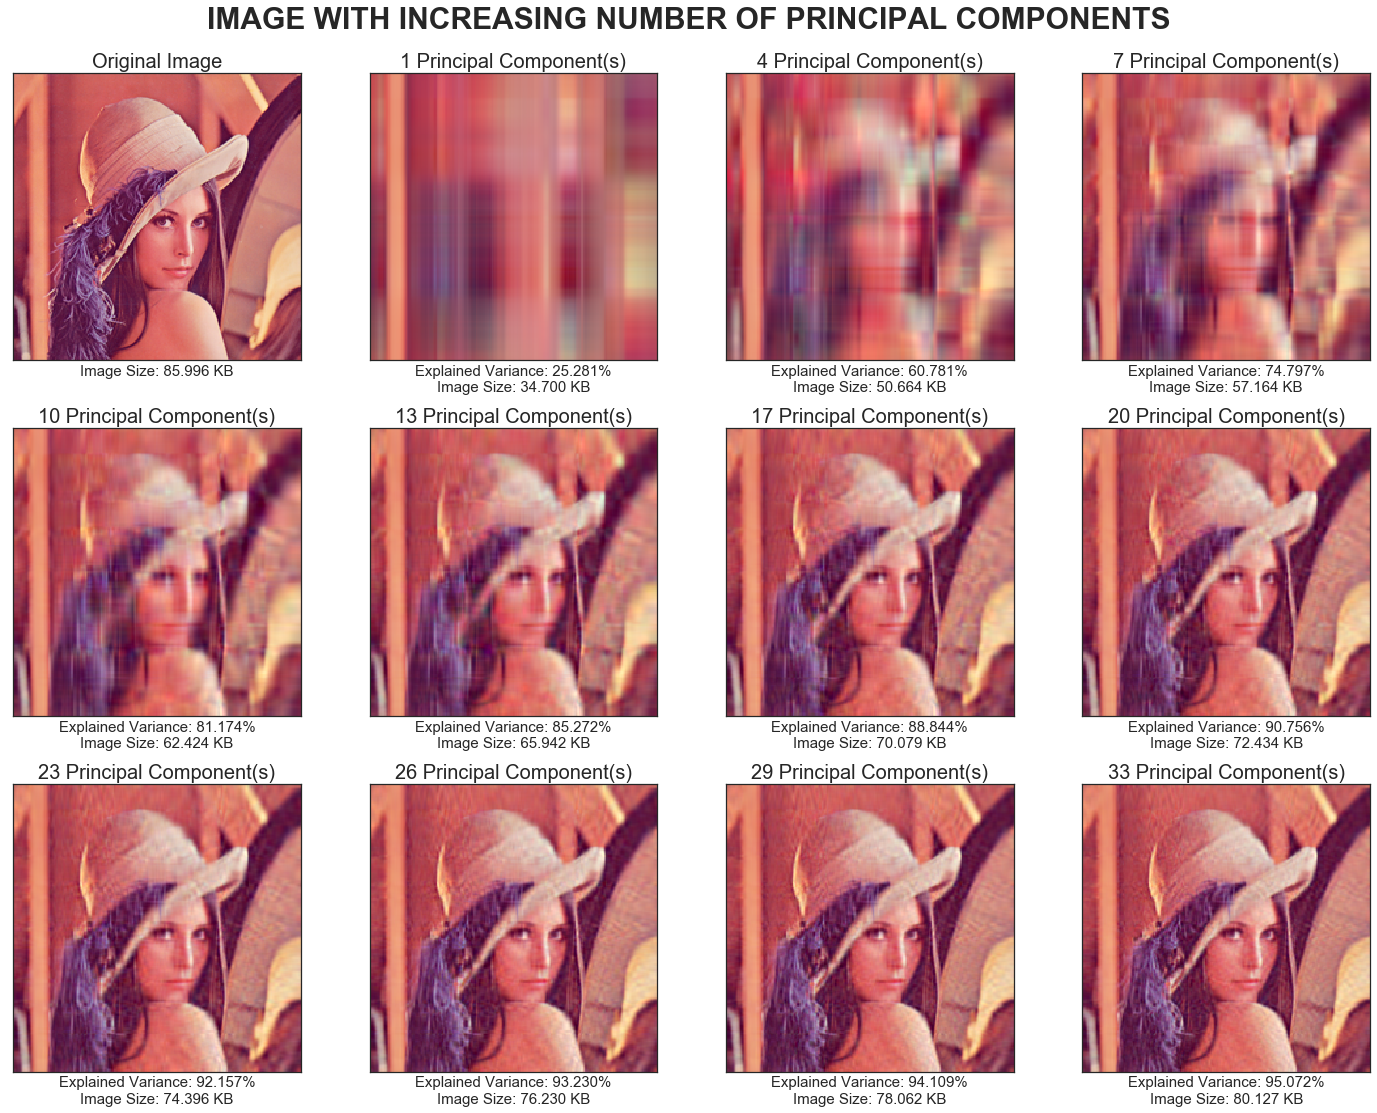

In [30]:
n_pca_images = (3, 4)
end_pc = pca_results[pca_results["Explained Variance"] >= 95].index[0]

fig, axes = plt.subplots(*n_pca_images, figsize=(20,15))
plot_n = np.linspace(1, end_pc, n_pca_images[0]*n_pca_images[1]-1, endpoint = True, dtype = int) 

# PLOTTING ORIGINAL IMAGE
axes[0][0].imshow(X.reshape(*ori_img.size, 3))
axes[0][0].set_title("Original Image", fontsize = 20)
axes[0][0].set_xlabel("Image Size: {:.3f} KB".format(ori_img_size), fontsize = 15)
axes[0][0].set_xticks([])
axes[0][0].set_yticks([])
        
for ax, n in zip(axes.flat[1:], plot_n):
    # PLOTTING COMPRESSED IMAGE
    ax.imshow(pca_results.loc[n, "Pixels"]/255)
    ax.set_title("{} Principal Component(s)".format(n), fontsize = 20)
    ax.set_xlabel("Explained Variance: {:.3f}%\nImage Size: {:.3f} KB".format(pca_results.loc[n, "Explained Variance"],
                                                                            pca_results.loc[n, "Image Size (KB)"]),
                  fontsize = 15)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
fig.suptitle("IMAGE WITH INCREASING NUMBER OF PRINCIPAL COMPONENTS", size = 30, y = 1.03, fontweight = "bold")
plt.show()

## PCA Metrics: Optimal Number of Principal Components
In this section, we will try to search for an optimal number of PCs in order to reduce the memory size to be as small as possible while achieving the expected explained variance percentage.

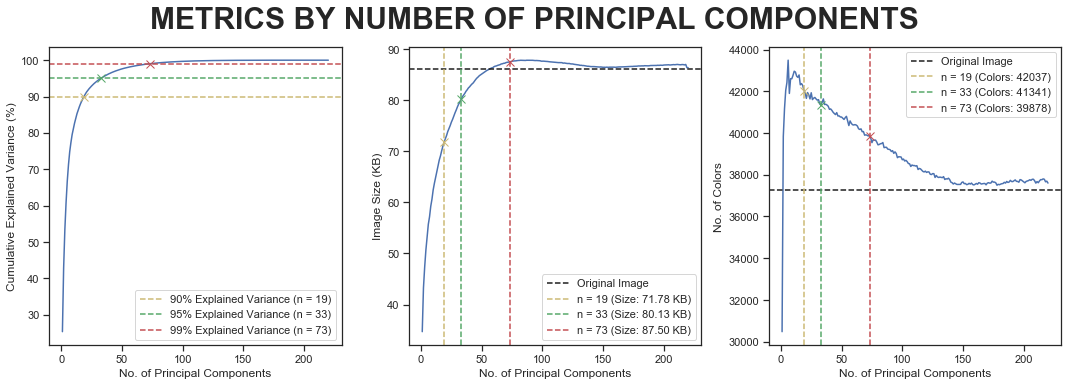

In [31]:
line_colors = "ygr"
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for ax, metric in zip(axes, pca_results.columns[1:]):
    sns.lineplot(x = pca_results.index, y = metric, data = pca_results, ax = ax)
    ax.set_xlabel("No. of Principal Components")
    
    if metric == "Explained Variance":
        lookup_n_var = []
        for idx, exp_var in enumerate([90, 95, 99]):
            lookup_n = pca_results[pca_results[metric] >= exp_var].index[0]
            lookup_n_var.append(lookup_n)
            ax.axhline(y = exp_var, color = line_colors[idx], linestyle = '--',
                       label = "{}% Explained Variance (n = {})".format(exp_var, lookup_n))
            ax.plot(lookup_n, exp_var, color = line_colors[idx], marker = 'x', markersize = 8)
            ax.set_ylabel("Cumulative Explained Variance (%)")
        ax.legend()
        continue
    elif metric == "Image Size (KB)":
        y_val = ori_img_size
        line_label = "n = {} (Size: {:.2f} KB)"
    elif metric == "No. of Colors":
        y_val = ori_img_n_colors
        line_label = "n = {} (Colors: {})"
        
    ax.axhline(y = y_val, color = 'k', linestyle = '--', label = "Original Image")
    for idx, n_components in enumerate(lookup_n_var):
        lookup_value = pca_results.loc[n_components, metric]
        ax.axvline(x = n_components, color = line_colors[idx], linestyle = '--',
                   label = line_label.format(n_components, lookup_value))
        ax.plot(n_components, lookup_value, color = line_colors[idx], marker = 'x', markersize = 8)
    ax.legend()
plt.tight_layout()
fig.suptitle("METRICS BY NUMBER OF PRINCIPAL COMPONENTS", size = 30, y = 1.07, fontweight = "bold")
plt.show()

We want to get the optimal number of principal components by first analyzing the explained variance, here is the thought process:
* Left plot: We need 19, 33, and 73 principal components to be able 90%, 95%, and 99% respectively explain the variance of our original image.
* Mid plot: But there's a trade-off, the more variance we want to explain, the bigger is the image size. The black dashed line indicates the original image size, we want to choose $n$ below this line. So, it's either 19 or 33 principal components.
* Right plot: The number of colors present in the image will be less if we increase $n$ from 19 to 33 and then to 73. 

From the plots, we can conclude to choose **33 principal components** because it gives us smaller image size with reasonably high explained variance, and the number of colors is closer to the original image than using 19 principal components.

In [32]:
target_exp_var = 95
n_opt = pca_results[pca_results["Explained Variance"] >= target_exp_var].index[0]
n_opt

33

## Compare to Original Image
Finally, let's compare the compressed image using $n = 33$ with the original image side by side.

In [33]:
pc_reduced = {
    "Type": "PC-Reduced",
    "Pixels": pca_results.loc[n_opt, "Pixels"],
    "No. of Colors": pca_results.loc[n_opt, "No. of Colors"],
    "Image Size (KB)": pca_results.loc[n_opt, "Image Size (KB)"],
    "Explained Variance": pca_results.loc[n_opt, "Explained Variance"]
}
ori_vs_pca = pd.DataFrame([ori, pc_reduced]).set_index("Type")
ori_vs_pca

Pixels  No. of Colors  \
Type                                                                           
Original    [[225, 137, 127], [224, 137, 127], [227, 134, ...          37270   
PC-Reduced  [[[207.8943800542848, 120.1619226529473, 109.2...          41341   

            Image Size (KB)  Explained Variance  
Type                                             
Original             85.996             100.000  
PC-Reduced           80.127              95.072

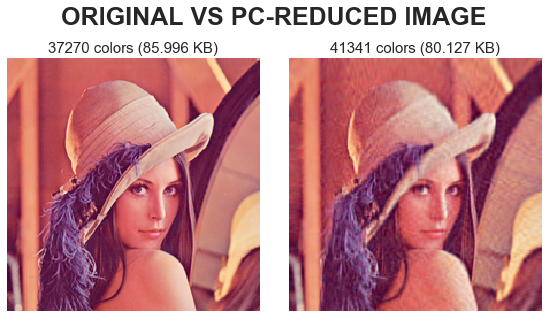

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
for ax, (typ, row) in zip(axes.flat, ori_vs_pca.iterrows()):
    img_array = np.array(row["Pixels"]/255)
    ax.imshow(img_array.reshape(*ori_img.size, 3))
    ax.axis("off")
    ax.set_title("{} colors ({:.3f} KB)".format(row["No. of Colors"], row["Image Size (KB)"]), fontsize=15)
plt.tight_layout()
fig.suptitle("ORIGINAL VS PC-REDUCED IMAGE", size = 25, y = 1.1, fontweight = "bold")
plt.show()

In [35]:
relative_size = ori_vs_pca.loc["PC-Reduced", "Image Size (KB)"]/ori_vs_kmeans.loc["Original", "Image Size (KB)"]
print("Reduction: {:.3f}% from original image size".format((1-relative_size)*100))
print("Explained Variance: {:.3f}%".format(ori_vs_pca.loc["PC-Reduced", "Explained Variance"]))

Reduction: 6.825% from original image size
Explained Variance: 95.072%


By using PCA, we only achieve a reduction of 6.825% in image size and the compressed image success to capture 95.072% variance of the original image. Next, we compare the result between K-Means and PCA side by side.

# Comparison of K-Means and PCA
We consider several metrics to compare the compressed image using K-Means and PCA:
- Image size in kilobytes
- Explained variance in percentage
- Number of unique colors present in the image

In [36]:
final_compare = pd.DataFrame([ori, color_reduced, pc_reduced]).set_index("Type")
final_compare

Pixels  \
Type                                                               
Original       [[225, 137, 127], [224, 137, 127], [227, 134, ...   
Color-Reduced  [[[232.0675287356287, 146.05028735631967, 119....   
PC-Reduced     [[[207.8943800542848, 120.1619226529473, 109.2...   

               No. of Colors  Image Size (KB)  Explained Variance  
Type                                                               
Original               37270           85.996             100.000  
Color-Reduced             12           18.049              95.916  
PC-Reduced             41341           80.127              95.072

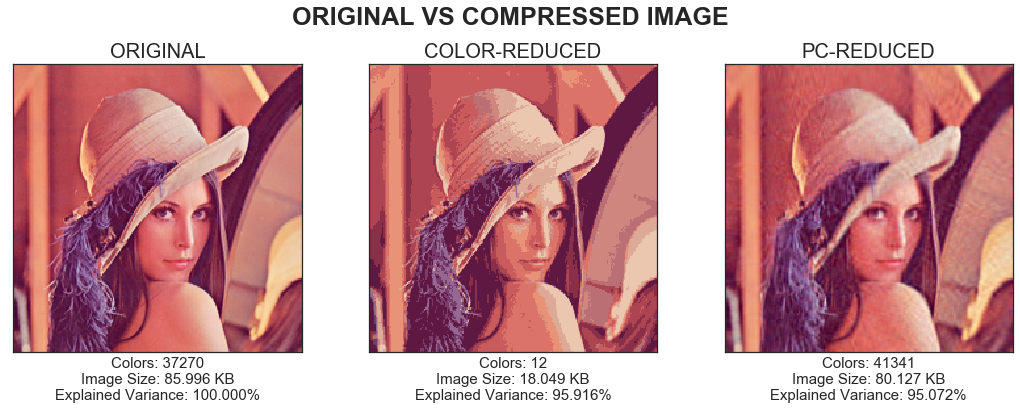

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for ax, (typ, row) in zip(axes.flat, final_compare.iterrows()):
    img_array = np.array(row["Pixels"])/255
    ax.imshow(img_array.reshape(*ori_img.size, 3))
    ax.set_xlabel("Colors: {}\nImage Size: {:.3f} KB\nExplained Variance: {:.3f}%".format(row["No. of Colors"],
                                                                                row["Image Size (KB)"],
                                                                                row["Explained Variance"]), fontsize=15)
    ax.set_title(typ.upper(), fontsize=20)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
fig.suptitle("ORIGINAL VS COMPRESSED IMAGE", size = 25, y = 1.1, fontweight = "bold")
plt.show()

In [38]:
reduction_kmeans = (1-final_compare.loc["Color-Reduced", "Image Size (KB)"] / ori_img_size) * 100
reduction_pca = (1-final_compare.loc["PC-Reduced", "Image Size (KB)"] / ori_img_size) * 100
print("Image Size Reduction using K-Means: {:.3f}%".format(reduction_kmeans))
print("Image Size Reduction using PCA: {:.3f}%".format(reduction_pca))

Image Size Reduction using K-Means: 79.012%
Image Size Reduction using PCA: 6.825%


# Conclusion

We successfully perform image compression using Unsupervised Learning algorithm, such as K-Means Clustering and Dimensionality Reduction using Principal Component Analysis (PCA).

In K-Means, the selection of an optimal number of clusters k is usually done subjectively through visualization. Here, we present two methods for objective selection, namely:
- Elbow method using the longest perpendicular distance
- Second derivative using the finite difference method

In PCA, determining the number of PCs used starts from the target explained variance, then also considered the reduction of image size and number of colors to analyze their similarity with the original image.

Using K-Means, image size reduction reaches 79.012% and able to explain 95.916% variance of the original image with only 12 colors. Using PCA, image size reduction is only 6.825% and explains 95,072% variance according to our target. More colors are present in the PC-reduced image than the original image indicating the presence of noise. It can be seen subjectively that the colors in the color-reduced image are coarser than the PC-reduced image.

K-Means is more recommended to be used in reducing image size compared to PCA but if we want to keep the overall color of the original image, use PCA.

Another suggestion is to try performing two methods successively for image reduction, i.e. K-Means then PCA, or PCA then K-Means.